# Film_Fortune_Telling


### Final Project submission :

1. Student name: Abigael Nyatichi Nyabaga
2. Student pace: Full time
3. Scheduled project review date/time: 22.03.2024
4. Instructor name: Asha Deen, Lucille Kaleha
5. Blog post URL:

## Business problem

 > Business Problem : Microsoft wants to start a film company
 
 Microsoft decides to venture into the world of movie production, but they're new to the game. I have been given a task  to figure out what kinds of movies are popular right now. Your job is to dig into the data and give them advice on what types of movies they should focus on making. With my insights, Microsoft can make smart decisions about their film projects and increase their chances of success in the industry.

In [1]:
#Import libraries and packages
import pandas as pd 
import gzip
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data :1

In [2]:
df_bom_gross=pd.read_csv("data/bom.movie_gross.csv.gz")
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### Data interpretation
This data frame is made up of 3387 rows and 5 columns. The values of this table include: title, studio, domestic_gross, foreign_gross and year of production. The data types of this dataframe include :float,int and object.
1. from the data provided we can do an analysis on which movie produced the higest domestic and foreign gross profit in a specific year , say 2010

In [4]:
# Filtering data for the year 2010
df_2010 = df_bom_gross[df_bom_gross['year'] == 2010]
df_2010

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
323,The Taqwacores,Strand,11400.0,NaN,2010
324,Cherry,Abr.,11400.0,NaN,2010
325,Terkel in Trouble,Indic.,10800.0,NaN,2010
326,Kimjongilia,Lorb.,4400.0,NaN,2010


In [5]:
# Finding the movie with the highest domestic gross profit
highest_domestic_movie = df_2010.loc[df_2010['domestic_gross'].idxmax()]

print("Movie with the highest domestic gross profit in 2010:")
print(highest_domestic_movie[['title', 'domestic_gross']])

Movie with the highest domestic gross profit in 2010:
title             Toy Story 3
domestic_gross    415000000.0
Name: 0, dtype: object


In [6]:
# Convert 'foreign_gross' column to numeric type
df_2010.loc[:, 'foreign_gross'] = pd.to_numeric(df_2010['foreign_gross'], errors='coerce')

# Finding the movie with the highest foreign gross profit
highest_foreign_movie = df_2010.loc[df_2010['foreign_gross'].idxmax()]
print("\nMovie with the highest foreign gross profit in 2010:")
print(highest_foreign_movie[['title', 'foreign_gross']])



TypeError: reduction operation 'argmax' not allowed for this dtype

**Lets add a bar graph to visualize the top movies with the highest domestic and foreign gross profits in 2010.**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the DataFrame by combined gross and select the top ten movies
top_ten_movies = df_2010.nlargest(10, 'combined_gross')

# Number of movies
num_movies = top_ten_movies.shape[0]

# Width of each bar
bar_width = 0.35

# Index for the x-axis
index = np.arange(num_movies)

# Plotting
plt.figure(figsize=(12, 8))
domestic_bars = plt.bar(index, top_ten_movies['domestic_gross'], bar_width, label='Domestic Gross')
foreign_bars = plt.bar(index + bar_width, top_ten_movies['foreign_gross'], bar_width, label='Foreign Gross')

plt.xlabel('Movie')
plt.ylabel('Gross Profit')
plt.title('Top 10 Movies with Combined Domestic and Foreign Gross in 2010')
plt.xticks(index + bar_width / 2, top_ten_movies['title'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'combined_gross'

### Analysis result
From the visualization above  we see that The movie *Toy story* gave the highest gross profit with its foreign gross being higher than its domestic gross.Generally, from the graph we can see that foreign gross profit is higher than domestic gross profit 

## Load Data: 2

In [47]:
import gzip
df_movie_info = pd.read_csv("data/rt.movie_info.tsv.gz",delimiter='\t', compression='gzip')
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [48]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Data interpretation
This data frame contains 1560 rows and 12 columns. The column values include: id , synopsis,rating ,genre, director,writer,theater_date, dvd_date, currency  ,box_office , runtime, studio.  From the data given we can carry out various analysis questions such as:
1. Which movie genre has the highest ratings: here we can use the values from column :id,rating,genre. We can then merge it to another table to get the names of the movies.
2.  we can then look at the run time for the most popular movies by segmenting the top ten movies as grouped by ratings.
3. we can also view the number of movies produced by different studios such as Entertainment one studio

#### Step one
Genre Analysis:

1. What are the most common genres? # Drama
2. Which genres tend to have higher ratings?
3. Are there any trends or patterns in genre popularity over time?

In [49]:
# Most common genres
common_genres = df_movie_info['genre'].value_counts().head(5)
print("Most common genres:")
print(common_genres)
print()


Most common genres:
genre
Drama                                151
Comedy                               110
Comedy|Drama                          80
Drama|Mystery and Suspense            67
Art House and International|Drama     62
Name: count, dtype: int64



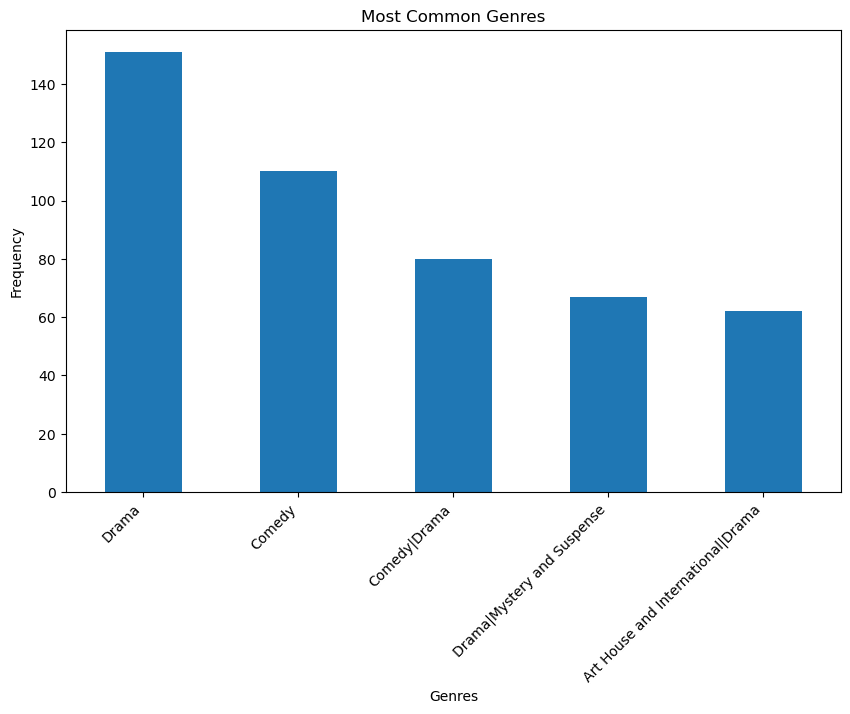

In [50]:
# Plotting histogram
plt.figure(figsize=(10, 6))
common_genres.plot(kind='bar')
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Analysis result
The genre with the highest frequency is drama which shows that most people prefer to watch movies under this genre.
> Having seen this trend , I would advice Microsoft to focus on producing more comedy,drama movies.

### step two
##### Movie Runtime Analysis:
1. What is the distribution of movie runtimes?
   - find the mode runtime.
> plot a histogram to show 

In [51]:
# Calculate the mode of the runtime
mode_runtime = df_movie_info['runtime'].mode()

print("Mode of the runtime:", mode_runtime)

Mode of the runtime: 0    90 minutes
Name: runtime, dtype: object


In [52]:
# Check the frequency of the mode(s)
mode_frequency = df_movie_info['runtime'].value_counts().loc[mode_runtime]
print("Frequency of the mode runtime(s):")
print(mode_frequency)

Frequency of the mode runtime(s):
runtime
90 minutes    72
Name: count, dtype: int64


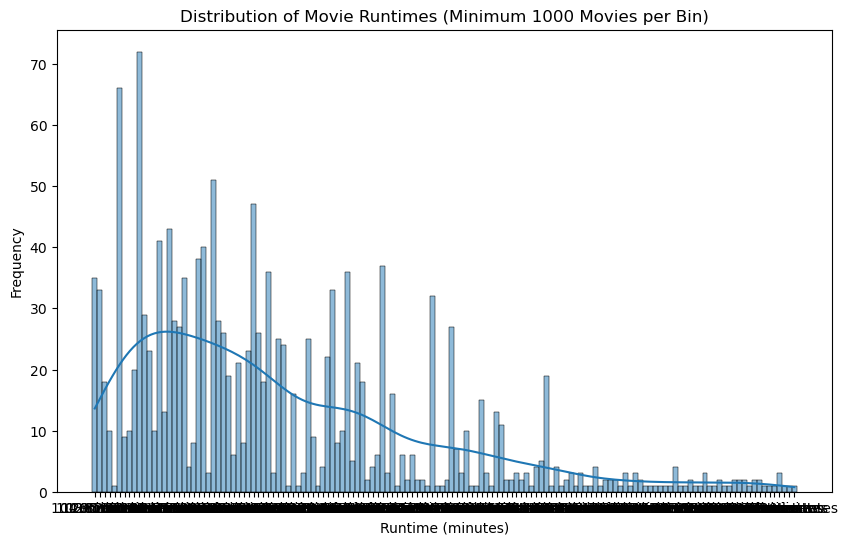

In [53]:
# Set the minimum number of movies per bin
min_bin_count = 1000

# Calculate the number of bins based on the minimum count
n_bins = int(len(df_movie_info) / min_bin_count)

# 1. Distribution of Movie Runtimes with a minimum frequency of 1000 movies
plt.figure(figsize=(10, 6))
sns.histplot(df_movie_info['runtime'], bins=n_bins, kde=True)
plt.title('Distribution of Movie Runtimes (Minimum 1000 Movies per Bin)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


### Analysis result
The mode runtime is 90 minutes and the frequency of movies within a sample of the data that have a runtime of 90 minutes in 72 movies.
- This analysis shows that most people love watching movies that have a runtime of 90 minutes.
- The graph is also skewed to the right. This shows that as the runtime increases the frequency of the movies decreases. This shows that, people generaly prefer movies with lesser runtime. 

## Load data: 3

In [54]:
df_reviews = pd.read_csv("data/rt.reviews.tsv.gz",delimiter='\t', compression='gzip',encoding='latin1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [55]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Data interpretation
The dataframe has 54432 rows and 8 columns.The column values include:id, review, fresh, critic, top_critic, publisher, date.The data types of the values include : int and object.
> The analysis that can be done on this is which movie has the highest reviews 

In [56]:
# Group by 'id' and sum up the number of reviews for each movie
reviews_count = df_reviews.groupby('id')['review'].count()

# Find the movie with the highest number of reviews
highest_reviews_movie_id = reviews_count.idxmax()
highest_reviews_count = reviews_count.max()

print("Movie with the highest number of reviews:")
print("Movie ID:", highest_reviews_movie_id)
print("Number of Reviews:", highest_reviews_count)

Movie with the highest number of reviews:
Movie ID: 782
Number of Reviews: 338


### Analysis result
The movie with the highest reviews is movie ID. A critical analysis of data by going over the reviews content can help in getting a feedback from the audience and can help improve on meeting the needs of the audience. Analyzing the data from the df_reviews DataFrame can provide valuable insights into critical and audience reception, inform strategic decision-making, and guide the studio's efforts to produce high-quality, successful movies.

## Load data: 4

In [57]:
df_tmdb_movies =pd.read_csv("data/tmdb.movies.csv.gz", compression='gzip',index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [58]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## Data interpretation
This data frame has 26517 rows and 9 columns. The columns contain values of:  genre_ids,id, original_language, original_title,
popularity, release_date, title, vote_average, vote_count .
The type of analysis that can be done on this data includes:

1. Which movies are most popular.
2. Do a correlation analysis between original language and popularity.
3. Do a correlation between popularity and vote average.

In [59]:
# Sort the DataFrame based on 'popularity' column in descending order
sorted_movies = df_tmdb_movies.sort_values(by='popularity', ascending=False)

# Select the top 10 rows from the sorted DataFrame
top_10_popular_movies = sorted_movies.head(10)

# Print the result
print("Most Popular Movies:")
print(top_10_popular_movies[['title', 'popularity']])


Most Popular Movies:
                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


##### Correlation analysis 
1. Between popularity and vote average

In [60]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the 'original_language' column into numerical categories
label_encoder = LabelEncoder()
df_tmdb_movies['language_code'] = label_encoder.fit_transform(df_tmdb_movies['original_language'])

# Step 2: Access the encoded 'language_code' column and 'popularity' column
language_code = df_tmdb_movies['language_code']
popularity = df_tmdb_movies['popularity']

# Step 3: Calculate the correlation
correlation_language_popularity = language_code.corr(popularity)

# Step 4: Print the correlation value
print("Correlation between Original Language and Popularity:", correlation_language_popularity)


Correlation between Original Language and Popularity: 0.010369893176499922


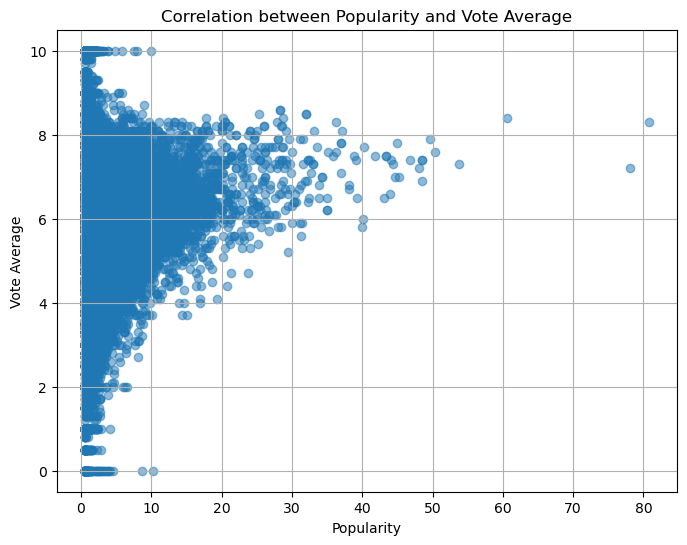

In [61]:
# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_tmdb_movies['popularity'], df_tmdb_movies['vote_average'], alpha=0.5)
plt.title('Correlation between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()


### Analysis result
There is a very weak positive to no correlation between the number of votes a movie gets and its popularity. This shows that Popularity of a movie is not affected by its number of votes There fore the number of votes of a movie does not affect its popularity

## Load data :5

In [9]:
df_movie_budgets = pd .read_csv("data/tn.movie_budgets.csv.gz")
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data interpretation
The data frame has 5782 rows and 6 columns.The columns contain values of id,release_date, movie, production_budget, domestic_gross, worldwide_gross. The type of analysis thatcan be done on this include:

1. Relationship between production budget and both domestic gross profit and world wide gross profit.
2. join this table to the bom_gross table to know the movie name of movies that resulted in the highest domestic and worldwide gross.

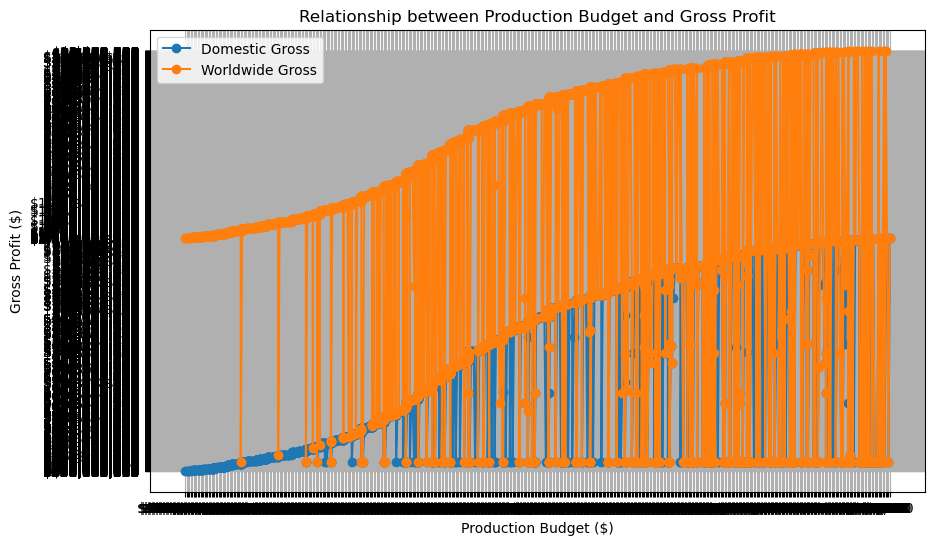

In [12]:
plt.figure(figsize=(10, 6))

# Plotting domestic gross profit
plt.plot(df_movie_budgets['production_budget'], df_movie_budgets['domestic_gross'], label='Domestic Gross', marker='o')

# Plotting worldwide gross profit
plt.plot(df_movie_budgets['production_budget'], df_movie_budgets['worldwide_gross'], label='Worldwide Gross', marker='o')

plt.title('Relationship between Production Budget and Gross Profit')
plt.xlabel('Production Budget ($)')
plt.ylabel('Gross Profit ($)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Assuming the join is based on movie title
merged_data = pd.merge(df_movie_budgets, df_bom_gross, how='inner', left_on='movie', right_on='title')

# Movie with the highest domestic gross
highest_domestic_gross_movie = merged_data.loc[merged_data['domestic_gross'].idxmax()]

# Movie with the highest worldwide gross
highest_worldwide_gross_movie = merged_data.loc[merged_data['worldwide_gross'].idxmax()]

print("Movie with the highest domestic gross:")
print(highest_domestic_gross_movie[['movie', 'domestic_gross']])
print()
print("Movie with the highest worldwide gross:")
print(highest_worldwide_gross_movie[['movie', 'worldwide_gross']])

KeyError: 'domestic_gross'